In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("spam_mails.csv")

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data = data.drop(["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"] , axis=1)

In [6]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
data["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
print("Have any messing values ?\n " , data.isnull().values.any())

Have any messing values ?
  False


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
data.describe(include="all")

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


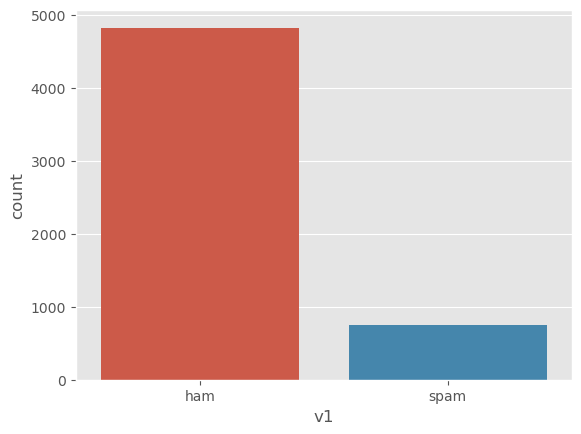

In [21]:
sns.countplot(x="v1" ,data=data)
plt.style.use('ggplot')
plt.show()

In [37]:
y=data["v1"]

In [38]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [39]:
from sklearn.preprocessing  import LabelEncoder

In [40]:
y_encoded = LabelEncoder().fit_transform(y)

In [41]:
y_encoded

array([0, 0, 1, ..., 0, 0, 0])

- 0-------ham
- 1-------spam

In [42]:
x = data["v2"]

In [43]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [55]:
from sklearn.model_selection import train_test_split

In [58]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.2  , random_state=3 , shuffle=True)

# Change string Values to integers

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
feature_extraction = TfidfVectorizer(min_df=1 , stop_words="english" , lowercase=True)

In [70]:
x_train_featured = feature_extraction.fit_transform(x_train)
x_test_featured = feature_extraction.transform(x_test)

In [79]:
x_train_featured

<4457x7511 sparse matrix of type '<class 'numpy.float64'>'
	with 34759 stored elements in Compressed Sparse Row format>

In [75]:
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

In [77]:
y_test_encoded

array([0, 1, 0, ..., 0, 0, 1])

In [78]:
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

# Model1 "Using Logistic Regression"

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model_1=LogisticRegression()

In [82]:
model_1.fit(x_train_featured , y_train_encoded)

LogisticRegression()

In [83]:
preds = model_1.predict(x_test_featured)

In [84]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
comp_table = pd.DataFrame({
    "Actual Output":y_test_encoded , 
    "Preds Output": preds
})

In [86]:
comp_table

,Actual Output,Preds Output
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
1110,0,0
1111,0,0
1112,0,0
1113,0,0


Evaluate the model

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [95]:
print("The Accuracy of our model is :  " , f1_score(y_test_encoded , preds)*100 , "%")

The Accuracy of our model is :   84.44444444444446 %


In [96]:
matrix_accuracy1 = confusion_matrix(y_test_encoded , preds)

In [97]:
matrix_accuracy1

array([[959,   1],
       [ 41, 114]], dtype=int64)

<Axes: >

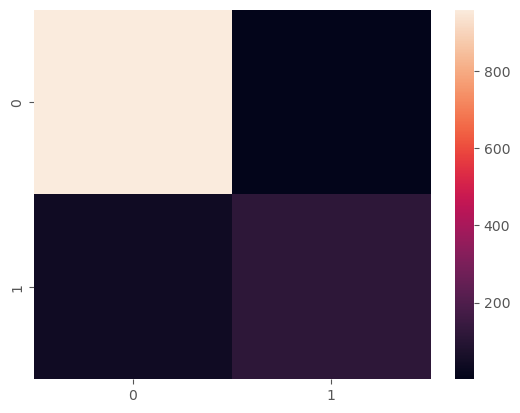

In [99]:
sns.heatmap(matrix_accuracy1)

# Using Another Model and compare the accuracy "KNN

How does it work?
K is the number of nearest neighbors to use. For classification, a majority vote is used to determined which class a new observation should fall into. Larger values of K are often more robust to outliers and produce more stable decision boundaries than very small values (K=3 would be better than K=1, which might produce undesirable results

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
model_2 = KNeighborsClassifier()

In [108]:
model_2.fit(x_train_featured , y_train_encoded)

KNeighborsClassifier()

In [109]:
preds2 = model_2.predict(x_test_featured)

In [110]:
preds2

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
comp_table_model_2 = pd.DataFrame({
    "Actual Output":y_test_encoded , 
    "Preds Output": preds2
})

In [112]:
comp_table_model_2

,Actual Output,Preds Output
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
1110,0,0
1111,0,0
1112,0,0
1113,0,0


In [113]:
print("The Accuracy of our model is :  " , f1_score(y_test_encoded , preds2)*100 , "%")

The Accuracy of our model is :   48.78048780487805 %


In [114]:
matrix_accuracy2 = confusion_matrix(y_test_encoded , preds2)

In [115]:
matrix_accuracy2

array([[960,   0],
       [105,  50]], dtype=int64)

It's Bad !!!!

# Using Another Model "SVM"

How does Support Vector Machine Algorithm Work?
One reasonable choice for the best hyperplane in a Support Vector Machine (SVM) is the one that maximizes the separation margin between the two classes. The maximum-margin hyperplane, also referred to as the hard margin, is selected based on maximizing the distance between the hyperplane and the nearest data point on each side.

In [116]:
from sklearn.svm import SVC

In [165]:
model_3 = SVC(kernel='sigmoid')

In [166]:
model_3.fit(x_train_featured,y_train_encoded)

SVC(kernel='sigmoid')

In [167]:
preds3=model_3.predict(x_test_featured)

In [168]:
preds3

array([0, 1, 0, ..., 0, 0, 0])

In [169]:
comp_table_model_3 = pd.DataFrame({
    "Actual Output":y_test_encoded , 
    "Preds Output": preds3
})

In [170]:
comp_table_model_3

,Actual Output,Preds Output
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1110,0,0
1111,0,0
1112,0,0
1113,0,0


In [171]:
print("The Accuracy of our model is :  " , f1_score(y_test_encoded , preds3)*100 , "%")

The Accuracy of our model is :   93.15068493150685 %


In [172]:
matrix_accuracy3 = confusion_matrix(y_test_encoded , preds3)

In [173]:
matrix_accuracy3

array([[959,   1],
       [ 19, 136]], dtype=int64)

It's more better !!!!!

# Using Neural Network To build Classification Model

In [174]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [209]:
model_4 = Sequential([
    Dense(units=15, activation='sigmoid', input_shape=(x_train_featured.shape[1],)),
    Dense(units=1, activation='sigmoid'),
])
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 15)                  │         112,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,696 (440.22 KB)

 Trainable params: 112,696 (440.22 KB)

 Non-trainable params: 0 (0.00 B)

In [210]:
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_4.fit(x_train_featured, y_train_encoded,validation_data=(x_test_featured , y_test_encoded), epochs=100)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4859 - loss: 0.6823 - val_accuracy: 0.8610 - val_loss: 0.4517
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.4192 - val_accuracy: 0.8610 - val_loss: 0.3680
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3550 - val_accuracy: 0.8610 - val_loss: 0.3358
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3206 - val_accuracy: 0.8610 - val_loss: 0.3105
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.2828 - val_accuracy: 0.8610 - val_loss: 0.2843
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8652 - loss: 0.2653 - val_accuracy: 0.8619 - val_loss: 0.2566
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8735 - loss: 0.2331 - val_accuracy: 0.8771 - val_loss: 0.2284
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8940 - loss: 0.2116 - val_accu

In [211]:
preds4 = model_4.predict(x_test_featured).reshape(-1,)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [212]:
preds4

array([4.52976792e-06, 9.99819934e-01, 1.02051694e-04, ...,
       1.57222232e-07, 7.62551725e-02, 1.10773202e-02], dtype=float32)

In [217]:

# Convert continuous probabilities to binary labels (0 or 1)
preds4_binary = (preds4 > 0.5).astype(int)  # Apply threshold of 0.5



In [221]:
# Now you can compute classification metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
print(f"Accuracy Score: {accuracy_score(y_test_encoded , preds4_binary)*100}%")
print("--------------------------------------\n")

# Calculate precision, recall, and F1 score
print(f"Precision: {precision_score(y_test_encoded , preds4_binary)*100}%")
print("--------------------------------------\n")

print(f"Recall: {recall_score(y_test_encoded , preds4_binary)*100}%")
print("--------------------------------------\n")

print(f"F1 Score: {f1_score(y_test_encoded , preds4_binary)*100}%")


Accuracy Score: 99.10313901345292%
--------------------------------------

Precision: 100.0%
--------------------------------------

Recall: 93.54838709677419%
--------------------------------------

F1 Score: 96.66666666666666%


In [223]:
print("The Confusion Matrix\n" , confusion_matrix(y_test_encoded , preds4_binary))


The Confusion Matrix
 [[960   0]
 [ 10 145]]


In [224]:
comp_table_model_4 = pd.DataFrame({
    "Actual Output":y_test_encoded , 
    "Preds Output": preds4_binary
})

In [225]:
comp_table_model_4

,Actual Output,Preds Output
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1110,0,0
1111,0,0
1112,0,0
1113,0,0


It's better 

# So the Neural Network Model is the best Model , and the next is SVM